# Подключение гугл диска

In [1]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/3_year/WSI

/content/gdrive/MyDrive/3_year/WSI


# Установки и импорты

In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 120.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [5]:
import sys
from pathlib import Path
sys.path.append('/content/gdrive/MyDrive/3_year/WSI/lexsubgen/')

In [6]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/MyDrive/3_year/WSI/lexsubgen/']

In [7]:
import importlib
import numpy as np
import pandas as pd
from itertools import product, combinations

In [8]:
from typing import Iterable, Dict, Union
import os

In [9]:
import warnings

warnings.filterwarnings('ignore')

# Работа с датасетом

In [10]:
dataset_path = Path('./semeval-2010/semeval_2010_truncated.csv').resolve()
dataset_path

PosixPath('/content/gdrive/MyDrive/3_year/WSI/semeval-2010/semeval_2010_truncated.csv')

In [11]:
import pandas as pd

In [12]:
dataset_2010 = pd.read_csv(dataset_path, index_col=0)
dataset_2010.head()

,context_id,target_label,target_lemma,pos_tag,sentence,target_id
5285,cheat.v.1,cheat.v,cheat,v,"[zheng_bing] Good grief ! At first , we , that...",36
5286,cheat.v.2,cheat.v,cheat,v,"[zheng_bing] Look , she 's cheating you out of...",16
5287,cheat.v.3,cheat.v,cheat,v,[Tim_Russert] But did n't North Korea develop ...,30
5288,cheat.v.4,cheat.v,cheat,v,[Robert_Gallucci] And the deal would have had ...,21
5289,cheat.v.5,cheat.v,cheat,v,[Tim_Russert] But they broke their word /. [Ro...,10


# Генерация подстановок

In [ ]:
from lexsubgen.bert_estimator import BertProbEstimator
from lexsubgen.MLM_substitutes import MultilingualSubstituteGenerator

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


2023-06-27 06:41:52,008 - simalign.simalign - INFO - Initialized the EmbeddingLoader with model: bert-base-multilingual-cased
INFO:simalign.simalign:Initialized the EmbeddingLoader with model: bert-base-multilingual-cased


In [ ]:
importlib.reload(sys.modules['lexsubgen.wsi_dataset'])

<module 'lexsubgen.wsi_dataset' from '/content/gdrive/MyDrive/3_year/WSI/lexsubgen/wsi_dataset.py'>

In [ ]:
from lexsubgen.wsi_dataset import WSIDataset, simple_collate_fn

In [ ]:
prob_estim_parameters = {
    'temperature': 0.1,
}
gener_parameters = {
    'languages': ['en', 'fr', 'de', 'es', 'ru'],
    'top_k': 30,
    'target_injection': True,
    'source_lang_inj': True,
    'words_only_subst': True,
    'lemmatize': True
}

In [ ]:
prob_estimator = BertProbEstimator(**prob_estim_parameters)
subst_generator = MultilingualSubstituteGenerator(prob_estimator, 'en', **gener_parameters)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from torch.utils.data import DataLoader

In [ ]:
my_dataset = WSIDataset(dataset_2010)
my_dataloader = DataLoader(
    my_dataset,
    batch_size=32,
    collate_fn=simple_collate_fn
)

In [ ]:
subst_folder = Path('./semeval-2010/substitutes').resolve()
subst_folder

filename = 'bert_substitutes.csv'

In [13]:
from tqdm import tqdm

In [ ]:
for batch in tqdm(my_dataloader):
    res = subst_generator.generate_all_langs(
        batch[:, 0],
        batch[:, 1],
        batch[:, 3],
        batch[:, 2],
    )
    subst_generator.write_substitutes(res,
                                      Path(subst_folder, filename))

100%|██████████| 6/6 [47:05<00:00, 470.94s/it]


In [ ]:
filename = 'bert_substitutes_transl_inj.csv'
gener_parameters = {
    'languages': ['en', 'fr', 'de', 'es', 'ru'],
    'top_k': 30,
    'target_injection': True,
    'source_lang_inj': False,
    'words_only_subst': True,
    'lemmatize': True
}

In [ ]:
subst_generator = MultilingualSubstituteGenerator(prob_estimator, 'en', **gener_parameters)

In [ ]:
for batch in tqdm(my_dataloader):
    res = subst_generator.generate_all_langs(
        batch[:, 0],
        batch[:, 1],
        batch[:, 3],
        batch[:, 2],
    )
    subst_generator.write_substitutes(res,
                                      Path(subst_folder, filename))

100%|██████████| 6/6 [37:51<00:00, 378.59s/it]


# Кластеризация

In [14]:
subst_folder = Path('./semeval-2010/substitutes').resolve()
subst_folder

PosixPath('/content/gdrive/MyDrive/3_year/WSI/semeval-2010/substitutes')

In [13]:
subst_dataset = pd.read_csv(Path(subst_folder, 'bert_substitutes.csv'), names=['lang', 'target_lemma', 'context_id', 'substitutes'])
subst_dataset.head()

,lang,target_lemma,context_id,substitutes
0,en,camp,camp.n.1,camp communiti camp area experi world base reg...
1,en,camp,camp.n.2,camp camp base facil site center centr unit fi...
2,en,camp,camp.n.3,camp parti organ group side countri agenc gove...
3,en,camp,camp.n.4,camp camp home hous field quarter barrack vill...
4,en,camp,camp.n.5,camp group categori class posit divis theori q...


In [ ]:
importlib.reload(sys.modules['lexsubgen.clusterizer'])

<module 'lexsubgen.clusterizer' from '/content/gdrive/MyDrive/3_year/WSI/lexsubgen/clusterizer.py'>

In [15]:
from lexsubgen.clusterizer import SubstituteClusterizer

In [16]:
clust_folder = Path('./semeval-2010/clusterization').resolve()

In [16]:
# темплейт для названия файла с результатами кластеризации

fname_tmp = 'bert__{target_inj}__{langs}__{n_subst}__{clusterizer}.json'

In [17]:
bert_subst_paths = {
    'source_target': Path(subst_folder, 'bert_substitutes.csv'),
    'transl_target': Path(subst_folder, 'bert_substitutes_transl_inj.csv')
}
langs = ['en', 'ru', 'fr',  'de', 'es']
n_substs = [5, 10, 15, 20, 25]
clusterizers = ['kmeans', 'agglomerative']

In [26]:
from itertools import product, combinations
from tqdm import tqdm

In [22]:
n = 10
sil_scores = {}
for substitutes_path, clusterizer in tqdm(product(bert_subst_paths, clusterizers)):
    clust = SubstituteClusterizer(
        n_clusters='maxsil=range(2, 7)',
        weighted_tfidf=True,
        use_idf=True,
        clusterizer=clusterizer,
        save_models=False,
    )
    substitutes = pd.read_csv(bert_subst_paths[substitutes_path], names=['lang', 'target_lemma', 'context_id', 'substitutes'])
    clust_res = clust.cluster_all(substitutes, langs=langs, n_subst=n)
    params = {
        'target_inj': substitutes_path,
        'langs': '-'.join(langs),
        'n_subst': n,
        'clusterizer': clusterizer
    }
    filename = fname_tmp.format(**params)
    clust._save_clusterization(clust_res, params, clust_folder, filename)
    sil_score = [v[0] for v in clust_res.values()]
    sil_scores[filename] = np.array(sil_score).mean()

sil_scores

0it [00:00, ?it/s]
100%|██████████| 11/11 [00:02<00:00,  4.71it/s]
1it [00:02,  2.38s/it]
100%|██████████| 11/11 [00:00<00:00, 50.80it/s]
2it [00:02,  1.13s/it]
100%|██████████| 10/10 [00:01<00:00,  5.32it/s]
3it [00:04,  1.49s/it]
100%|██████████| 10/10 [00:00<00:00, 54.07it/s]
4it [00:04,  1.19s/it]


{'bert__source_target__en-ru-fr-de-es__10__kmeans.json': 0.10151318682509576,
 'bert__source_target__en-ru-fr-de-es__10__agglomerative.json': 0.09006051582255387,
 'bert__transl_target__en-ru-fr-de-es__10__kmeans.json': 0.12101911672500203,
 'bert__transl_target__en-ru-fr-de-es__10__agglomerative.json': 0.10248858968257128}

## Разное количество подстановок

In [37]:
sil_scores = {}
clusterizer = 'kmeans'
langs = langs

for substitutes_path, n in tqdm(product(['source_target'], n_substs)):
    clust = SubstituteClusterizer(
        n_clusters='maxsil=range(2, 7)',
        weighted_tfidf=True,
        use_idf=True,
        clusterizer=clusterizer,
        save_models=False,
    )
    substitutes = pd.read_csv(bert_subst_paths[substitutes_path], names=['lang', 'target_lemma', 'context_id', 'substitutes'])
    clust_res = clust.cluster_all(substitutes, langs=langs, n_subst=n)
    params = {
        'target_inj': substitutes_path,
        'langs': '-'.join(langs),
        'n_subst': n,
        'clusterizer': clusterizer
    }
    filename = fname_tmp.format(**params)
    clust._save_clusterization(clust_res, params, clust_folder, filename)
    sil_score = [v[0] for v in clust_res.values()]
    sil_scores[filename] = np.array(sil_score).mean()

sil_scores

0it [00:00, ?it/s]
100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
1it [00:05,  5.64s/it]
100%|██████████| 11/11 [00:03<00:00,  3.05it/s]
2it [00:09,  4.49s/it]
100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
3it [00:13,  4.55s/it]
100%|██████████| 11/11 [00:06<00:00,  1.61it/s]
4it [00:20,  5.47s/it]
100%|██████████| 11/11 [00:07<00:00,  1.55it/s]
5it [00:28,  5.61s/it]


{'bert__source_target__en-ru-fr-de-es__5__kmeans.json': 0.09793423710873238,
 'bert__source_target__en-ru-fr-de-es__10__kmeans.json': 0.10170727354415635,
 'bert__source_target__en-ru-fr-de-es__15__kmeans.json': 0.105022016961798,
 'bert__source_target__en-ru-fr-de-es__20__kmeans.json': 0.10662075452140819,
 'bert__source_target__en-ru-fr-de-es__25__kmeans.json': 0.11039357545011459}

## Разные комбинации языков

In [28]:
pairs = list(combinations(langs, 2))[:4]
triples = list(combinations(langs, 3))[:6]
quarters = list(combinations(langs, 4))[:4]

lang_comb = [langs[0:1], *pairs, *triples, *quarters, langs]
lang_comb

[['en'],
 ('en', 'ru'),
 ('en', 'fr'),
 ('en', 'de'),
 ('en', 'es'),
 ('en', 'ru', 'fr'),
 ('en', 'ru', 'de'),
 ('en', 'ru', 'es'),
 ('en', 'fr', 'de'),
 ('en', 'fr', 'es'),
 ('en', 'de', 'es'),
 ('en', 'ru', 'fr', 'de'),
 ('en', 'ru', 'fr', 'es'),
 ('en', 'ru', 'de', 'es'),
 ('en', 'fr', 'de', 'es'),
 ['en', 'ru', 'fr', 'de', 'es']]

In [29]:
sil_scores = {}
clusterizer = 'kmeans'
n = 10

for substitutes_path, langs in tqdm(product(['source_target'], lang_comb)):
    clust = SubstituteClusterizer(
        n_clusters='maxsil=range(2, 7)',
        weighted_tfidf=True,
        use_idf=True,
        clusterizer=clusterizer,
        save_models=False,
    )
    substitutes = pd.read_csv(bert_subst_paths[substitutes_path], names=['lang', 'target_lemma', 'context_id', 'substitutes'])
    clust_res = clust.cluster_all(substitutes, langs=langs, n_subst=n)
    params = {
        'target_inj': substitutes_path,
        'langs': '-'.join(langs),
        'n_subst': n,
        'clusterizer': clusterizer
    }
    filename = fname_tmp.format(**params)
    clust._save_clusterization(clust_res, params, clust_folder, filename)
    sil_score = [v[0] for v in clust_res.values()]
    sil_scores[filename] = np.array(sil_score).mean()

sil_scores

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:01<00:00,  5.53it/s]
1it [00:01,  1.85s/it]
100%|██████████| 10/10 [00:01<00:00,  7.68it/s]
2it [00:03,  1.55s/it]
100%|██████████| 10/10 [00:01<00:00,  7.96it/s]
3it [00:04,  1.44s/it]
100%|██████████| 10/10 [00:01<00:00,  7.34it/s]
4it [00:05,  1.43s/it]
100%|██████████| 10/10 [00:01<00:00,  7.72it/s]
5it [00:07,  1.40s/it]
100%|██████████| 10/10 [00:01<00:00,  7.84it/s]
6it [00:08,  1.37s/it]
100%|██████████| 10/10 [00:01<00:00,  7.71it/s]
7it [00:09,  1.36s/it]
100%|██████████| 10/10 [00:02<00:00,  3.90it/s]
8it [00:12,  1.76s/it]
100%|██████████| 10/10 [00:04<00:00,  2.09it/s]
9it [00:17,  2.72s/it]
100%|██████████| 10/10 [00:01<00:00,  7.92it/s]
10it [00:18,  2.29s/it]
100%|██████████| 10/10 [00:01<00:00,  7.94it/s]
11it [00:19,  1.98s/it]
100%|██████████| 10/10 [00:01<00:00,  7.34it/s]
12it [00:21,  1.81s/it]
100%|██████████| 10/10 [00:01<00:00,  7.95it/s]
13it [00:22,  1.65s/it]
100%|██████████| 10/10 [00:01<00:00,  7.29it/s]
14it [

{'bert__transl_target__en__10__kmeans.json': 0.20587255629979762,
 'bert__transl_target__en-ru__10__kmeans.json': 0.15787438374000207,
 'bert__transl_target__en-fr__10__kmeans.json': 0.14946677478848455,
 'bert__transl_target__en-de__10__kmeans.json': 0.13287539634483472,
 'bert__transl_target__en-es__10__kmeans.json': 0.16293427386069143,
 'bert__transl_target__en-ru-fr__10__kmeans.json': 0.1319435910303132,
 'bert__transl_target__en-ru-de__10__kmeans.json': 0.12748017051669866,
 'bert__transl_target__en-ru-es__10__kmeans.json': 0.1370100421437237,
 'bert__transl_target__en-fr-de__10__kmeans.json': 0.1186559660448517,
 'bert__transl_target__en-fr-es__10__kmeans.json': 0.15647649308488357,
 'bert__transl_target__en-de-es__10__kmeans.json': 0.12546519181291999,
 'bert__transl_target__en-ru-fr-de__10__kmeans.json': 0.11580763868827845,
 'bert__transl_target__en-ru-fr-es__10__kmeans.json': 0.1360097781960023,
 'bert__transl_target__en-ru-de-es__10__kmeans.json': 0.11968064371438794,
 'ber

# Подсчет метрик

In [ ]:
importlib.reload(sys.modules['lexsubgen.evaluation'])

<module 'lexsubgen.evaluation' from '/content/gdrive/MyDrive/3_year/WSI/lexsubgen/evaluation.py'>

In [18]:
from lexsubgen.evaluation import WSIEvaluator

In [19]:
cluter_results_folder = Path('./semeval-2010/clusterization_results').resolve()
cluter_results_folder

PosixPath('/content/gdrive/MyDrive/3_year/WSI/semeval-2010/clusterization_results')

In [35]:
def compute_exp_metrics(clust_files: Iterable[str],
                        clust_folder: Union[str, os.PathLike],
                        clust_results_folder: Union[str, os.PathLike],
                        dataset: pd.DataFrame,
                        semeval_data_path='/content/gdrive/MyDrive/3_year/WSI/semeval-2010'):
    exp_names = []
    exp_results = []
    for filename in clust_files:
        eval = WSIEvaluator(dataset=dataset,
                            clust_res_path=Path(clust_folder, filename),
                            semeval_data_path=semeval_data_path)
        metrics = eval.compute_metrics()
        exp_names.append(filename)
        exp_results.append(metrics.loc['mean'])
        metrics.to_csv(Path(clust_results_folder, Path(filename).with_suffix('.csv')))
    return pd.DataFrame(exp_results, index=exp_names)

target injection

In [33]:
files = [
    'bert__source_target__en-ru-fr-de-es__10__kmeans.json',
    'bert__source_target__en-ru-fr-de-es__10__agglomerative.json',
    'bert__transl_target__en-ru-fr-de-es__10__kmeans.json',
    'bert__transl_target__en-ru-fr-de-es__10__agglomerative.json'
]
exp1_metrics = compute_exp_metrics(
    files,
    clust_folder,
    cluter_results_folder,
    dataset_2010
)
exp1_metrics

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5
bert__source_target__en-ru-fr-de-es__10__kmeans.json,42.47,36.73,63.86,28.75,24.69,43.49,32.661893
bert__source_target__en-ru-fr-de-es__10__agglomerative.json,52.32,54.58,59.65,32.89,36.34,38.01,39.568463
bert__transl_target__en-ru-fr-de-es__10__kmeans.json,32.29,26.11,58.58,27.61,23.56,42.88,29.186564
bert__transl_target__en-ru-fr-de-es__10__agglomerative.json,48.31,45.58,61.83,29.47,26.83,39.95,35.558408


In [ ]:
exp1_metrics

n_substs

In [36]:
files = [
    'bert__source_target__en-ru-fr-de-es__5__kmeans.json',
    'bert__source_target__en-ru-fr-de-es__10__kmeans.json',
    'bert__source_target__en-ru-fr-de-es__15__kmeans.json',
    'bert__source_target__en-ru-fr-de-es__20__kmeans.json',
    'bert__source_target__en-ru-fr-de-es__25__kmeans.json']

exp2_metrics = compute_exp_metrics(
    files,
    clust_folder,
    cluter_results_folder,
    dataset_2010
)
exp2_metrics

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5
bert__source_target__en-ru-fr-de-es__5__kmeans.json,33.02,25.88,58.51,23.73,19.94,36.16,26.902051
bert__source_target__en-ru-fr-de-es__10__kmeans.json,44.01,39.22,64.30,32.11,29.96,47.62,36.563425
bert__source_target__en-ru-fr-de-es__15__kmeans.json,34.72,28.73,57.80,27.46,23.80,41.06,30.012168
bert__source_target__en-ru-fr-de-es__20__kmeans.json,38.66,35.92,57.52,23.21,21.55,33.26,28.271481
bert__source_target__en-ru-fr-de-es__25__kmeans.json,39.26,34.80,58.64,26.47,23.72,38.10,30.494886


In [41]:
exp2_metrics.to_csv(Path(cluter_results_folder, 'bert_n_substitutes.csv'))

Сравнение с fasttext

In [25]:
truncated_targets = dataset_2010['target_label'].unique()

In [30]:
files = [
    'fr-es-de-ru-en__5__tf-idf-weighted__kmeans__dummy.csv',
    'fr-es-de-ru-en__10__tf-idf-weighted__kmeans__dummy.csv',
    'fr-es-de-ru-en__15__tf-idf-weighted__kmeans__dummy.csv',
    'fr-es-de-ru-en__20__tf-idf-weighted__kmeans__dummy.csv',
    'fr-es-de-ru-en__25__tf-idf-weighted__kmeans__dummy.csv',
]

exp2_fasttext = []
for file in files:
    exp2 = pd.read_csv(Path(cluter_results_folder, file), index_col=0)
    mean_metrics = exp2.loc[truncated_targets].mean(axis=0)
    exp2_fasttext.append(mean_metrics)
exp2_fasttext = pd.DataFrame(exp2_fasttext, index=files)
exp2_fasttext

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5
fr-es-de-ru-en__5__tf-idf-weighted__kmeans__dummy.csv,35.03,29.97,58.85,32.43,28.01,51.95,31.661311
fr-es-de-ru-en__10__tf-idf-weighted__kmeans__dummy.csv,35.66,30.24,55.63,25.54,21.61,38.13,28.681739
fr-es-de-ru-en__15__tf-idf-weighted__kmeans__dummy.csv,46.23,43.78,61.90,30.63,29.93,42.26,35.680309
fr-es-de-ru-en__20__tf-idf-weighted__kmeans__dummy.csv,46.80,41.14,64.00,30.67,26.27,41.94,35.354350
fr-es-de-ru-en__25__tf-idf-weighted__kmeans__dummy.csv,42.05,40.06,57.93,30.53,29.95,41.59,33.279898


In [42]:
exp2_fasttext.to_csv(Path(cluter_results_folder, 'fasttext_n_substitutes.csv'))

different lang combintions

In [60]:
files = [
    'bert__transl_target__en__10__kmeans.json',
    'bert__transl_target__en-ru__10__kmeans.json',
    'bert__transl_target__en-fr__10__kmeans.json',
    'bert__transl_target__en-de__10__kmeans.json',
    'bert__transl_target__en-es__10__kmeans.json',
    'bert__transl_target__en-ru-fr__10__kmeans.json',
    'bert__transl_target__en-ru-de__10__kmeans.json',
    'bert__transl_target__en-ru-es__10__kmeans.json',
    'bert__transl_target__en-fr-de__10__kmeans.json',
    'bert__transl_target__en-fr-es__10__kmeans.json',
    'bert__transl_target__en-de-es__10__kmeans.json',
    'bert__transl_target__en-ru-fr-de__10__kmeans.json',
    'bert__transl_target__en-ru-fr-es__10__kmeans.json',
    'bert__transl_target__en-ru-de-es__10__kmeans.json',
    'bert__transl_target__en-fr-de-es__10__kmeans.json',
    'bert__transl_target__en-ru-fr-de-es__10__kmeans.json'
]
exp3_metrics = compute_exp_metrics(
    files,
    clust_folder,
    cluter_results_folder,
    dataset_2010
)
exp3_metrics

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5
bert__transl_target__en__10__kmeans.json,29.84,20.12,64.43,36.35,27.62,62.53,32.335335
bert__transl_target__en-ru__10__kmeans.json,30.03,20.80,63.32,32.18,25.08,52.16,30.332884
bert__transl_target__en-fr__10__kmeans.json,31.62,22.32,63.98,33.50,25.74,58.06,31.940876
bert__transl_target__en-de__10__kmeans.json,27.20,19.13,53.80,25.88,20.45,40.17,25.379945
bert__transl_target__en-es__10__kmeans.json,32.15,24.31,60.61,29.03,23.21,46.22,29.190402
bert__transl_target__en-ru-fr__10__kmeans.json,32.49,26.30,58.16,27.07,23.63,40.02,29.070906
bert__transl_target__en-ru-de__10__kmeans.json,31.73,22.48,63.91,31.14,24.83,49.03,30.959766
bert__transl_target__en-ru-es__10__kmeans.json,33.23,24.22,62.47,30.94,24.43,52.51,31.572790
bert__transl_target__en-fr-de__10__kmeans.json,34.10,26.31,64.63,32.14,27.17,49.08,32.483132
bert__transl_target__en-fr-es__10__kmeans.json,37.70,31.51,63.42,31.09,26.89,47.87,32.811013


In [61]:
exp3_metrics.to_csv(Path(cluter_results_folder, 'bert_languages.csv'))

# Визуализация

In [31]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [38]:
exp2_metrics

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5
bert__source_target__en-ru-fr-de-es__5__kmeans.json,33.02,25.88,58.51,23.73,19.94,36.16,26.902051
bert__source_target__en-ru-fr-de-es__10__kmeans.json,44.01,39.22,64.30,32.11,29.96,47.62,36.563425
bert__source_target__en-ru-fr-de-es__15__kmeans.json,34.72,28.73,57.80,27.46,23.80,41.06,30.012168
bert__source_target__en-ru-fr-de-es__20__kmeans.json,38.66,35.92,57.52,23.21,21.55,33.26,28.271481
bert__source_target__en-ru-fr-de-es__25__kmeans.json,39.26,34.80,58.64,26.47,23.72,38.10,30.494886


In [44]:
exp2_metrics = pd.read_csv(Path(cluter_results_folder, 'bert_n_substitutes.csv'))
exp2_metrics[['model', 'target_injection', 'langs', 'n_subst', 'clusterization']] = exp2_metrics['Unnamed: 0'].str.split(pat='__', expand=True)
exp2_metrics['n_langs'] = exp2_metrics['langs'].str.split(pat='-').apply(len)
exp2_metrics.drop(columns=['Unnamed: 0'], inplace=True)

In [45]:
exp2_metrics

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5,model,target_injection,langs,n_subst,clusterization,n_langs
0,33.02,25.88,58.51,23.73,19.94,36.16,26.902051,bert,source_target,en-ru-fr-de-es,5,kmeans.json,5
1,44.01,39.22,64.30,32.11,29.96,47.62,36.563425,bert,source_target,en-ru-fr-de-es,10,kmeans.json,5
2,34.72,28.73,57.80,27.46,23.80,41.06,30.012168,bert,source_target,en-ru-fr-de-es,15,kmeans.json,5
3,38.66,35.92,57.52,23.21,21.55,33.26,28.271481,bert,source_target,en-ru-fr-de-es,20,kmeans.json,5
4,39.26,34.80,58.64,26.47,23.72,38.10,30.494886,bert,source_target,en-ru-fr-de-es,25,kmeans.json,5


In [46]:
exp2_fasttext = pd.read_csv(Path(cluter_results_folder, 'fasttext_n_substitutes.csv'))
exp2_fasttext[['langs', 'n_subst', 'vectorizer', 'clusterization', 'context']] = exp2_fasttext['Unnamed: 0'].str.split(pat='__', expand=True)
exp2_fasttext['n_langs'] = exp2_fasttext['langs'].str.split(pat='-').apply(len)

exp2_fasttext.drop(columns=['Unnamed: 0'], inplace=True)
exp2_fasttext

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5,langs,n_subst,vectorizer,clusterization,context,n_langs
0,35.03,29.97,58.85,32.43,28.01,51.95,31.661311,fr-es-de-ru-en,5,tf-idf-weighted,kmeans,dummy.csv,5
1,35.66,30.24,55.63,25.54,21.61,38.13,28.681739,fr-es-de-ru-en,10,tf-idf-weighted,kmeans,dummy.csv,5
2,46.23,43.78,61.90,30.63,29.93,42.26,35.680309,fr-es-de-ru-en,15,tf-idf-weighted,kmeans,dummy.csv,5
3,46.80,41.14,64.00,30.67,26.27,41.94,35.354350,fr-es-de-ru-en,20,tf-idf-weighted,kmeans,dummy.csv,5
4,42.05,40.06,57.93,30.53,29.95,41.59,33.279898,fr-es-de-ru-en,25,tf-idf-weighted,kmeans,dummy.csv,5


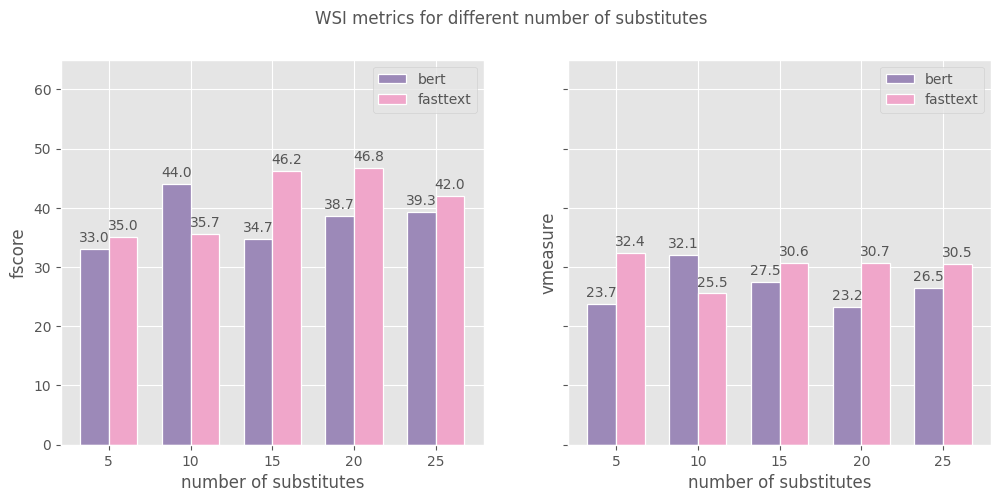

In [58]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

barWidth = 0.35

r1 = np.arange(len(exp2_metrics))
r2 = [x + barWidth for x in r1]

b1 = ax[0].bar(r1, exp2_metrics.fscore, width=barWidth, edgecolor="white", linewidth=0.9, color='#9c89b8', label='bert')
ax[0].bar_label(b1, labels=exp2_metrics.fscore.round(1), padding=3, color='#555555')

b1 = ax[1].bar(r1, exp2_metrics.vmeasure, width=barWidth, edgecolor="white", linewidth=0.9, color='#9c89b8', label='bert')
ax[1].bar_label(b1, labels=exp2_metrics.vmeasure.round(1), padding=3, color='#555555')


b2 = ax[0].bar(r2, exp2_fasttext.fscore, width=barWidth, edgecolor="white", linewidth=0.9, color='#f0a6ca', label='fasttext')
ax[0].bar_label(b2, labels=exp2_fasttext.fscore.round(1), padding=3, color='#555555')

b2 = ax[1].bar(r2, exp2_fasttext.vmeasure, width=barWidth, edgecolor="white", linewidth=0.9, color='#f0a6ca', label='fasttext')
ax[1].bar_label(b2, labels=exp2_fasttext.vmeasure.round(1), padding=3, color='#555555')

ax[0].grid(visible=True)
ax[0].set_ylim(top=65)

ax[0].set_xlabel('number of substitutes')
ax[1].set_xlabel('number of substitutes')
ax[0].set_ylabel('fscore')
ax[1].set_ylabel('vmeasure')
fig.suptitle('WSI metrics for different number of substitutes', fontdict={'color': '#555555'})

# Add xticks on the middle of the group bars
ax[0].set_xticks([r + barWidth / 2 for r in range(len(exp2_metrics))], exp2_metrics.n_subst)
ax[0].legend(labelcolor='#555555')
ax[1].set_xticks([r + barWidth / 2 for r in range(len(exp2_metrics))], exp2_metrics.n_subst)
ax[1].legend(labelcolor='#555555')

plt.show()

In [62]:
exp3 = pd.read_csv(Path(cluter_results_folder, 'bert_languages.csv'))
exp3[['model', 'target_injection', 'langs', 'n_subst', 'clusterization']] = exp3['Unnamed: 0'].str.split(pat='__', expand=True)
exp3['n_langs'] = exp3['langs'].str.split(pat='-').apply(len)
exp3.drop(columns=['Unnamed: 0'], inplace=True)
exp3

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5,model,target_injection,langs,n_subst,clusterization,n_langs
0,29.84,20.12,64.43,36.35,27.62,62.53,32.335335,bert,transl_target,en,10,kmeans.json,1
1,30.03,20.80,63.32,32.18,25.08,52.16,30.332884,bert,transl_target,en-ru,10,kmeans.json,2
2,31.62,22.32,63.98,33.50,25.74,58.06,31.940876,bert,transl_target,en-fr,10,kmeans.json,2
3,27.20,19.13,53.80,25.88,20.45,40.17,25.379945,bert,transl_target,en-de,10,kmeans.json,2
4,32.15,24.31,60.61,29.03,23.21,46.22,29.190402,bert,transl_target,en-es,10,kmeans.json,2
5,32.49,26.30,58.16,27.07,23.63,40.02,29.070906,bert,transl_target,en-ru-fr,10,kmeans.json,3
6,31.73,22.48,63.91,31.14,24.83,49.03,30.959766,bert,transl_target,en-ru-de,10,kmeans.json,3
7,33.23,24.22,62.47,30.94,24.43,52.51,31.572790,bert,transl_target,en-ru-es,10,kmeans.json,3
8,34.10,26.31,64.63,32.14,27.17,49.08,32.483132,bert,transl_target,en-fr-de,10,kmeans.json,3
9,37.70,31.51,63.42,31.09,26.89,47.87,32.811013,bert,transl_target,en-fr-es,10,kmeans.json,3


In [64]:
max_metrics_rows = exp3.groupby(by='n_langs').idxmax()
max_metrics_rows

,fscore,precision,recall,vmeasure,homogenity,completeness,(fs * vm) ** 0.5
n_langs,,,,,,,
1,0,0,0,0,0,0,0
2,4,4,2,2,2,2,2
3,9,9,10,8,8,7,9
4,14,14,12,11,12,11,11
5,15,15,15,15,15,15,15


In [65]:
fscore_max_vals = exp3.loc[max_metrics_rows.fscore]['fscore'].values
fscore_max_langs = exp3.loc[max_metrics_rows.fscore]['langs'].values
vmeasure_max_vals = exp3.loc[max_metrics_rows.vmeasure]['vmeasure'].values
vmeasure_max_langs = exp3.loc[max_metrics_rows.vmeasure]['langs'].values

In [84]:
from collections import defaultdict

In [96]:
fscore = exp3.groupby(['n_langs'])['fscore'].value_counts()

other_fscore = []
for i, val in fscore.index:
    if fscore_max_vals[i - 1] != val:
        other_fscore.append((i,val))
other_fscore = list(zip(*other_fscore))

In [100]:
vmeasure = exp3.groupby(['n_langs'])['vmeasure'].value_counts()

other_vmeasure = []
for i, val in vmeasure.index:
    if vmeasure_max_vals[i - 1] != val:
        other_vmeasure.append((i,val))
other_vmeasure = list(zip(*other_vmeasure))

Text(0.5, 1.0, 'Best language combinations for substitutes')

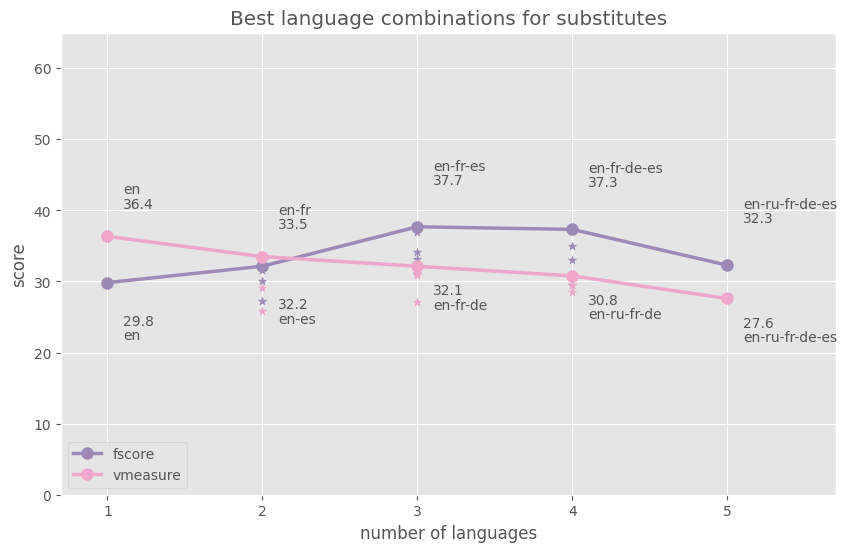

In [106]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(max_metrics_rows.index)
ax.set_ylim(top=65)
ax.set_xlim(left=0.7, right=5.7)

ax.scatter(other_fscore[0], other_fscore[1], marker="*", color='#9c89b8')
ax.plot(max_metrics_rows.index, fscore_max_vals, marker='o', markersize=8, color='#9c89b8', label='fscore', linewidth=2.5)
for i, txt in enumerate(fscore_max_langs):
    if i < 2:
        b1, b2 = -6, -8
    else:
        b1, b2 = +6, +8
    ax.annotate(txt, (max_metrics_rows.index[i] + 0.1, fscore_max_vals[i] + b2), color='#555555')
    ax.annotate(fscore_max_vals[i].round(1), (max_metrics_rows.index[i] + 0.1, fscore_max_vals[i] + b1), color='#555555')

ax.scatter(other_vmeasure[0], other_vmeasure[1], marker='*', color='#f0a6ca')
ax.plot(max_metrics_rows.index, vmeasure_max_vals, marker='o', markersize=8, color='#f0a6ca', label='vmeasure', linewidth=2.5)
for i, txt in enumerate(vmeasure_max_langs):
    if i < 2:
        b1, b2 = +4, +6
    else:
        b1, b2 = -4, -6
    ax.annotate(txt, (max_metrics_rows.index[i] + 0.1, vmeasure_max_vals[i] + b2), color='#555555')
    ax.annotate(vmeasure_max_vals[i].round(1), (max_metrics_rows.index[i] + 0.1, vmeasure_max_vals[i] +b1), color='#555555')

ax.set_xlabel('number of languages')
ax.set_ylabel('score')
ax.legend(labelcolor='#555555', loc='lower left')
ax.set_title('Best language combinations for substitutes', fontdict={'color': '#555555'})